In [1]:
# !git clone https://github.com/FabioMMaia/fjsp_genetic_tabu.git

In [27]:
import requests
from importlib import reload
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [28]:
import sys
sys.path.insert(1, "src")

import read_fjsp_file, dataviz_fjsp, pipeline_fjsp, genetic_fjsp
reload(read_fjsp_file)
reload(dataviz_fjsp)
reload(pipeline_fjsp)
reload(genetic_fjsp)

<module 'genetic_fjsp' from 'c:\\Users\\fabio\\OneDrive\\Área de Trabalho\\Mestrado\\SIN5006\\Implementacao\\fjsp_genetic_tabu\\src\\genetic_fjsp.py'>

# Testando usando mfjs02 (problema simples)

In [38]:
path = "https://www.ime.usp.br/~cris/fjs/benchmark/fmj/mfjs02"
txt = requests.get(path).text

In [39]:
dt_times, descr = read_fjsp_file.parse_data(txt, return_descr=True)
descr

{'N': 15, 'A': 10, 'K': 7}

In [41]:
dt_times.head()

machine,Job,Ope,M0,M1,M2,M3,M4,M5,M6
0,Job-1,O1_1,147.0,123.0,145.0,NaN,NaN,NaN,NaN
1,Job-1,O1_2,123.0,130.0,NaN,140.0,NaN,NaN,NaN
2,Job-1,O1_3,NaN,NaN,NaN,150.0,160.0,NaN,200.0
3,Job-2,O2_1,214.0,NaN,150.0,NaN,NaN,NaN,NaN
4,Job-2,O2_2,NaN,66.0,87.0,99.0,NaN,NaN,NaN


In [42]:
machines = dt_times.columns[dt_times.columns.str.startswith('M')].tolist()
machines

['M0', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6']

In [43]:
# Showing chromossome structure and check if is feasable
c1 = genetic_fjsp.Chromossome(dt_times, machines)
print(f'MS:{c1.MS[:10]}... OS:{c1.OS[:10]}...')
print('É factivel?', c1.check_factivel())

MS:[2, 3, 6, 2, 2, 6, 1, 2, 4, 1]... OS:[3, 2, 3, 1, 1, 1, 4, 2, 4, 5]...
É factivel? True


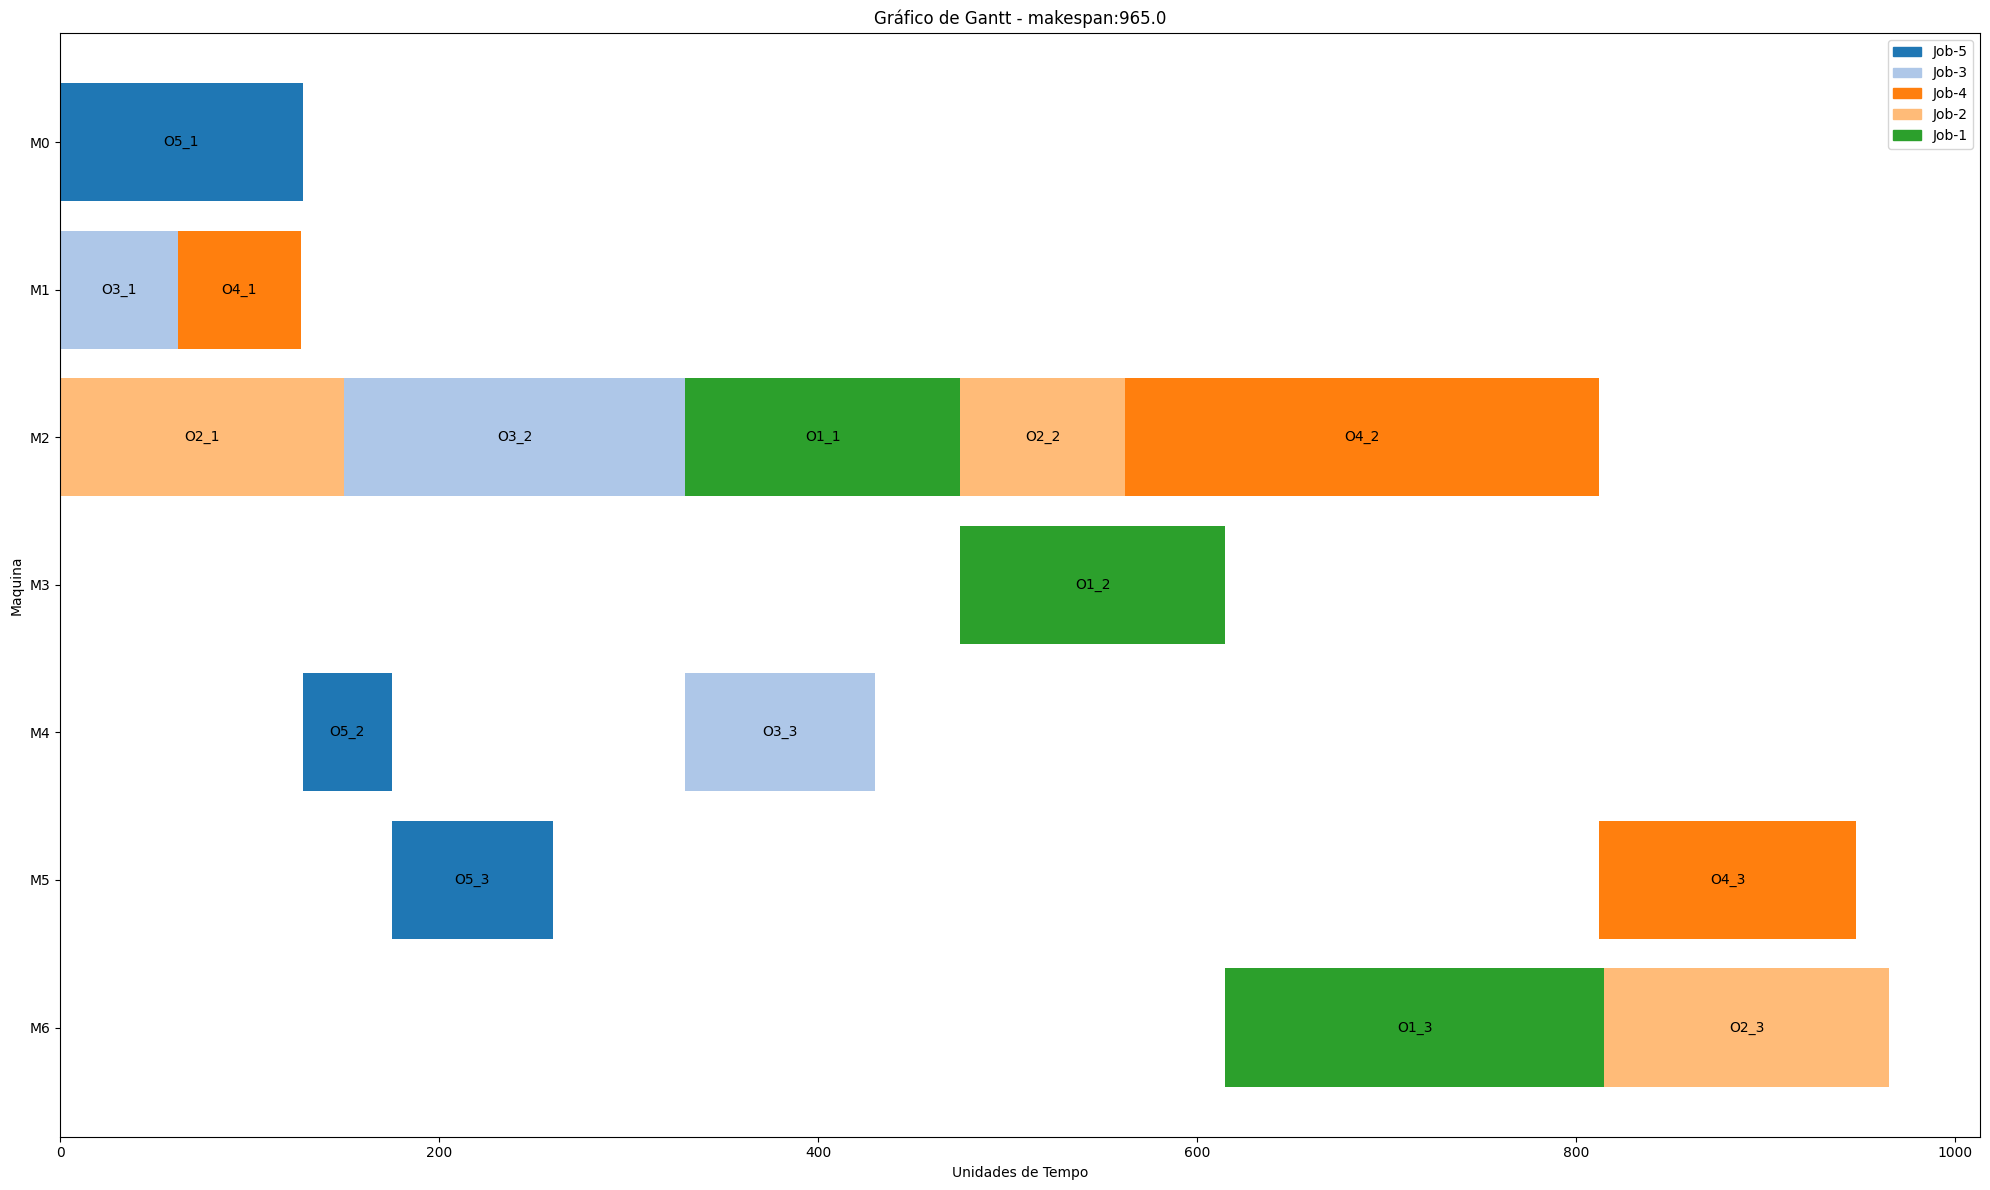

In [44]:
c1.show_output()

  0%|          | 0/400 [00:00<?, ?it/s]

100%|██████████| 400/400 [00:15<00:00, 26.19it/s]


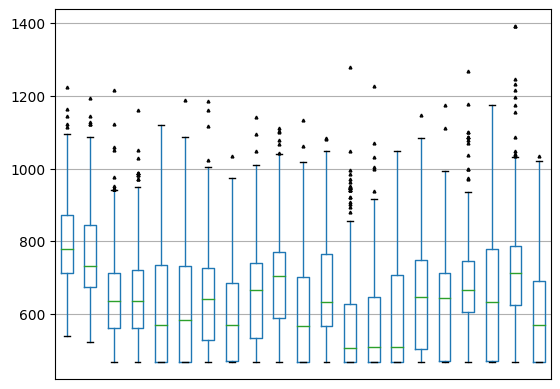

100%|██████████| 400/400 [00:14<00:00, 28.00it/s]


In [45]:
pop = genetic_fjsp.Population(dt_times, machines, Popsize=400, maxGen=200)
pop.pipeline_generation()

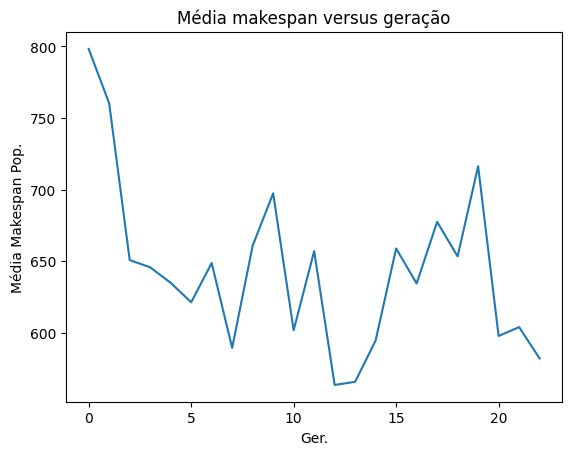

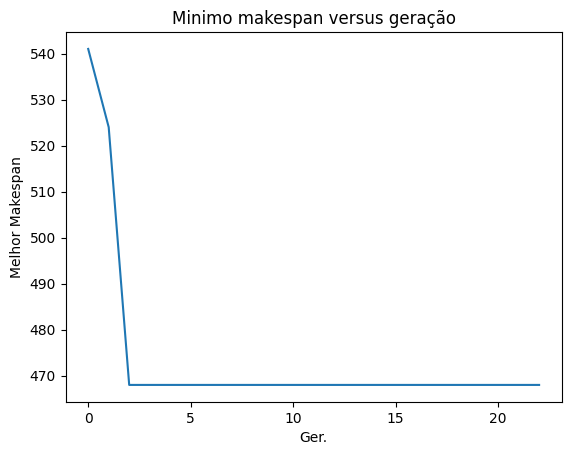

In [46]:
pd.DataFrame(pop.scores_values).mean(axis=0).plot()
plt.title('Média makespan versus geração')
plt.xlabel('Ger.')
plt.ylabel('Média Makespan Pop.')
plt.show()

pd.DataFrame(pop.scores_values).min(axis=0).plot()
plt.title('Minimo makespan versus geração')
plt.xlabel('Ger.')
plt.ylabel('Melhor Makespan')
plt.show()

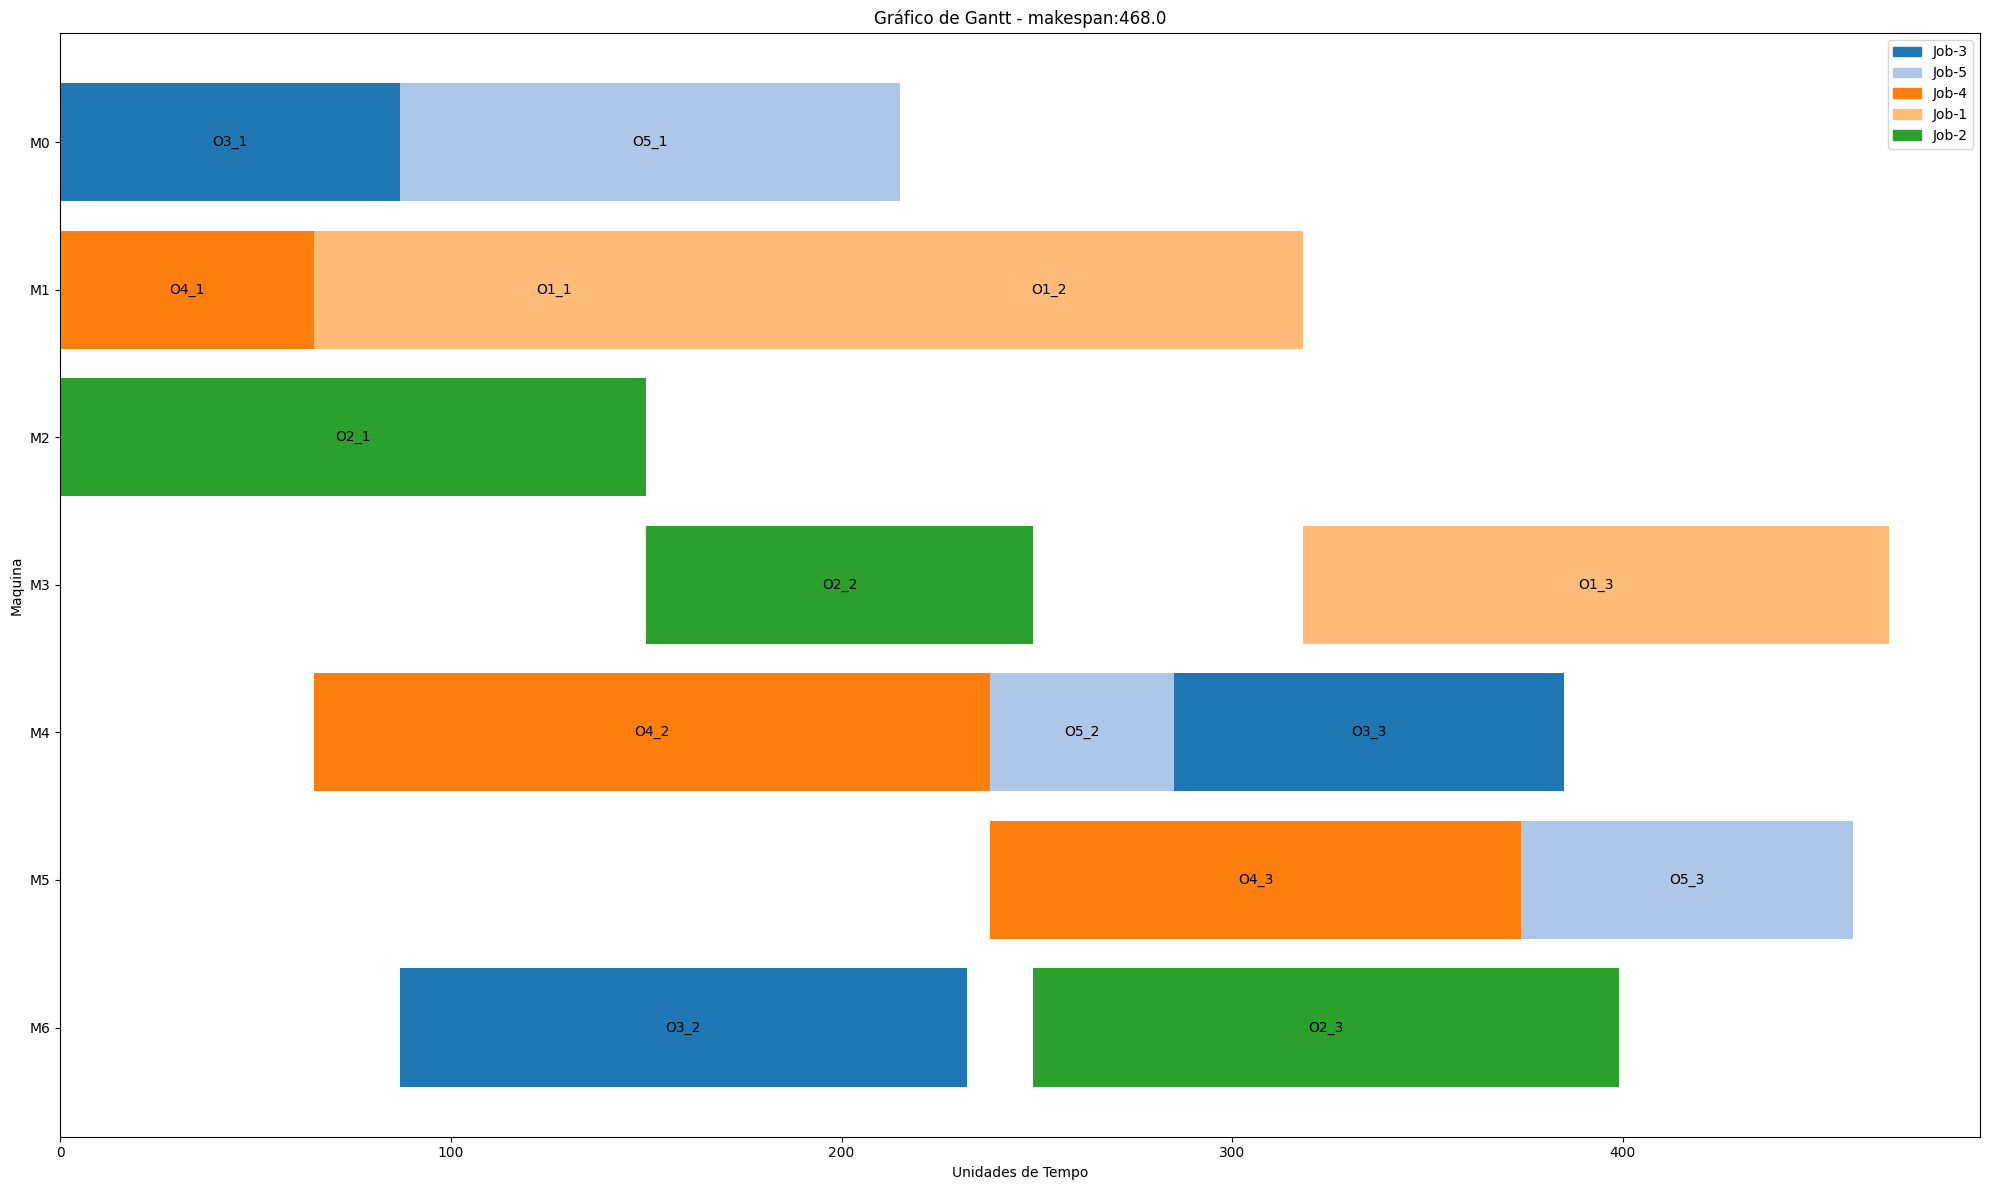

In [47]:
pop.best_chromossome.show_output()

# Testando com mfjs10 (problema mais complexo)

In [48]:
path = "https://www.ime.usp.br/~cris/fjs/benchmark/fmj/mfjs10"
txt = requests.get(path).text
dt_times, descr = read_fjsp_file.parse_data(txt, return_descr=True)
machines = dt_times.columns[dt_times.columns.str.startswith('M')].tolist()

100%|██████████| 400/400 [00:57<00:00,  6.98it/s]


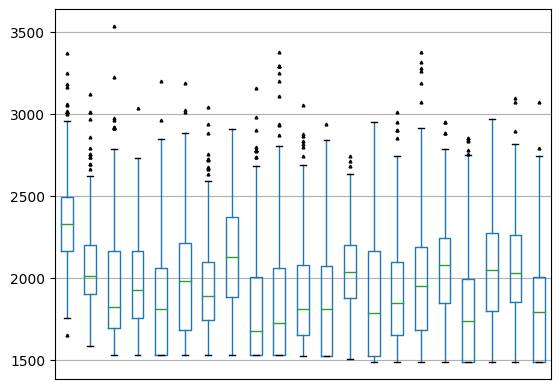

100%|██████████| 400/400 [00:45<00:00,  8.71it/s]


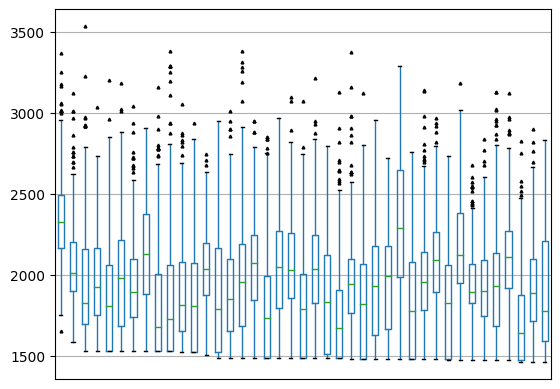

100%|██████████| 400/400 [00:44<00:00,  8.90it/s]


In [49]:
pop = genetic_fjsp.Population(dt_times, machines, Popsize=400, maxGen=200)
pop.pipeline_generation()

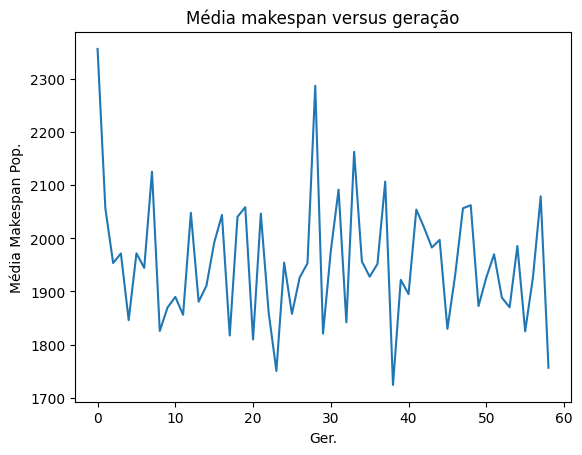

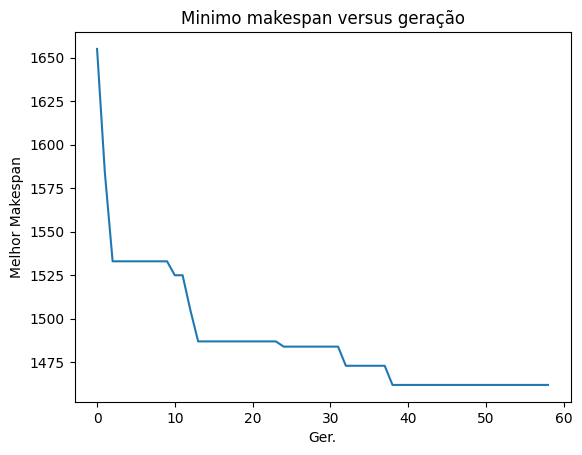

In [50]:
pd.DataFrame(pop.scores_values).mean(axis=0).plot()
plt.title('Média makespan versus geração')
plt.xlabel('Ger.')
plt.ylabel('Média Makespan Pop.')
plt.show()

pd.DataFrame(pop.scores_values).min(axis=0).plot()
plt.title('Minimo makespan versus geração')
plt.xlabel('Ger.')
plt.ylabel('Melhor Makespan')
plt.show()

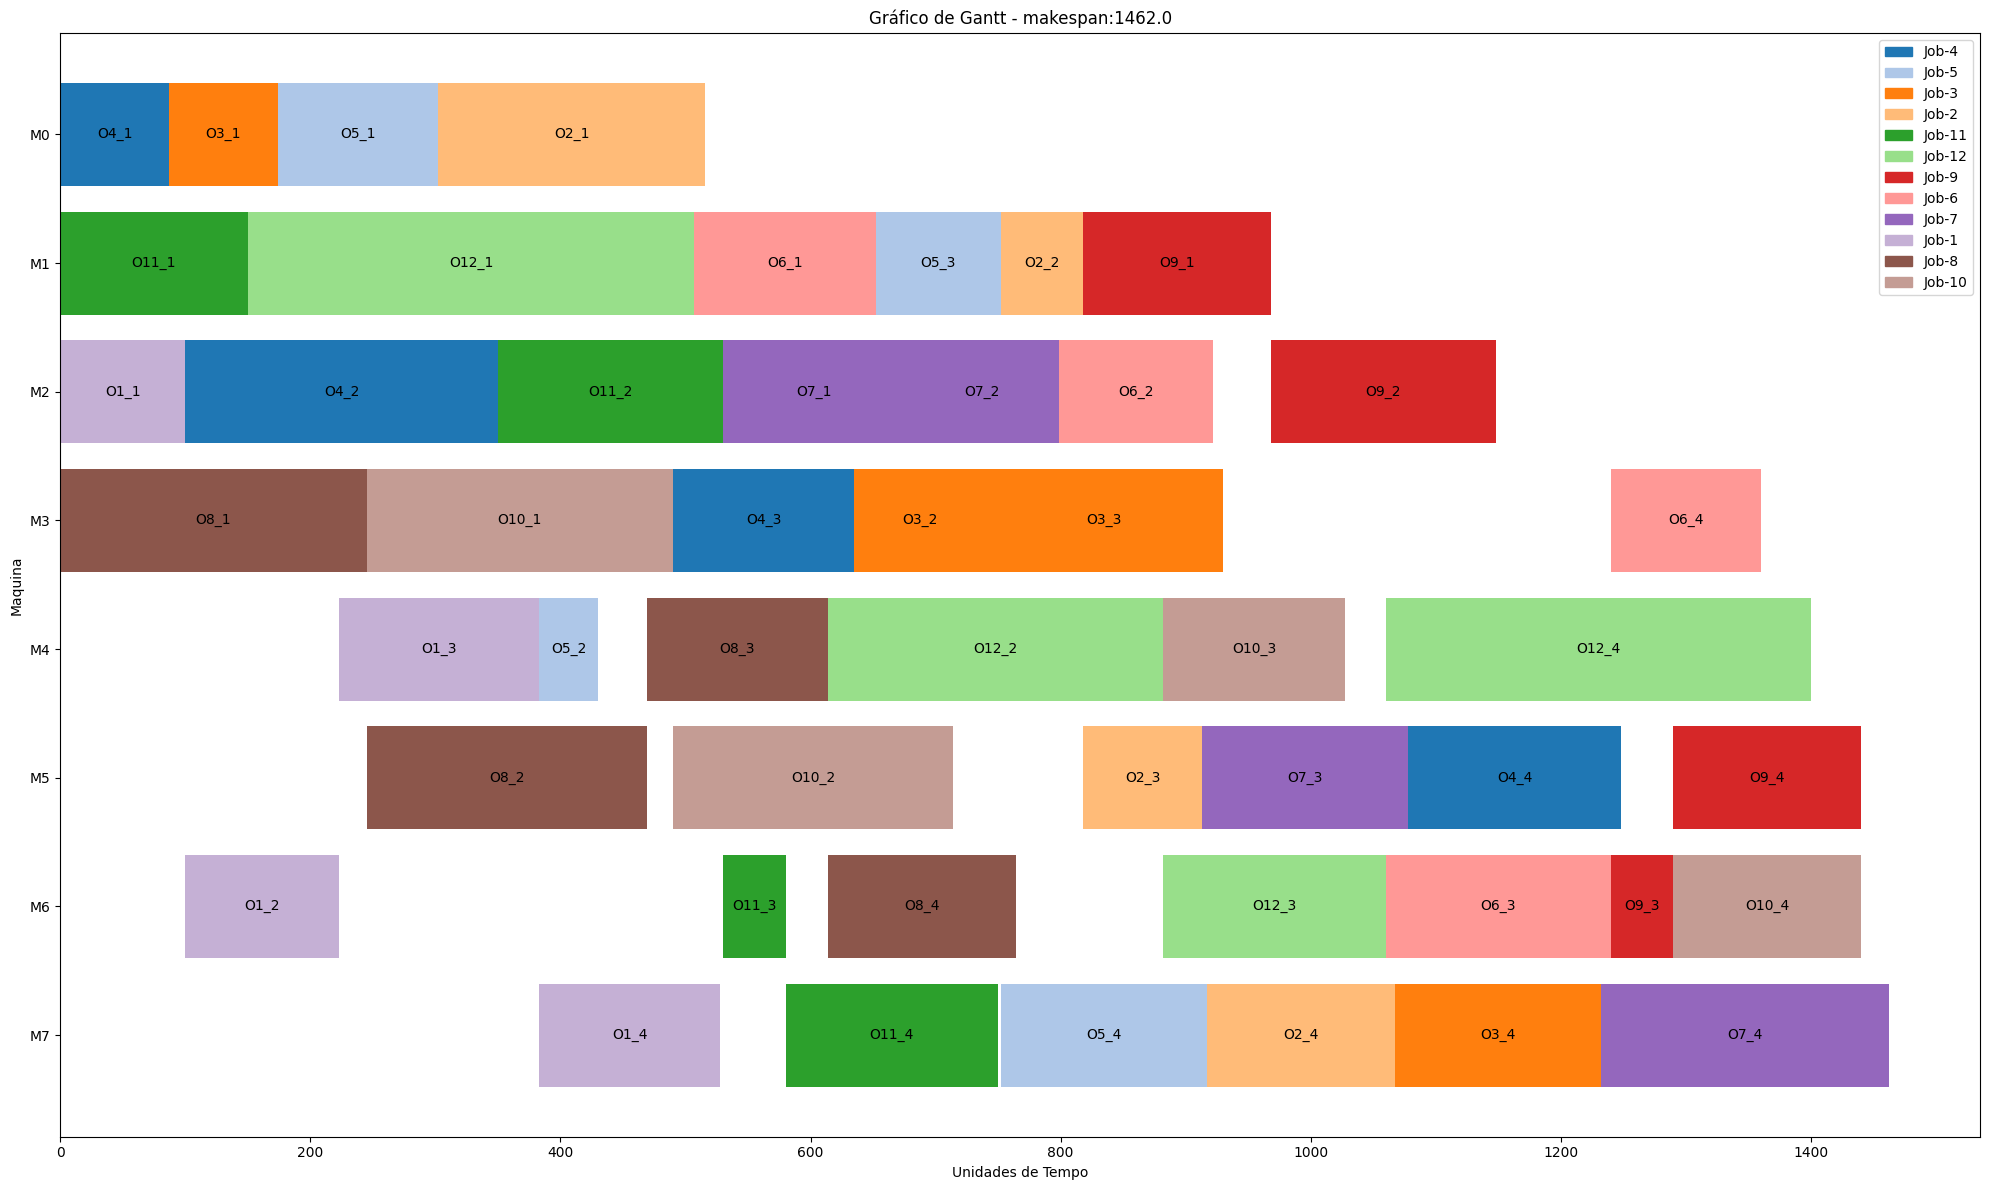

In [51]:
pop.best_chromossome.show_output()

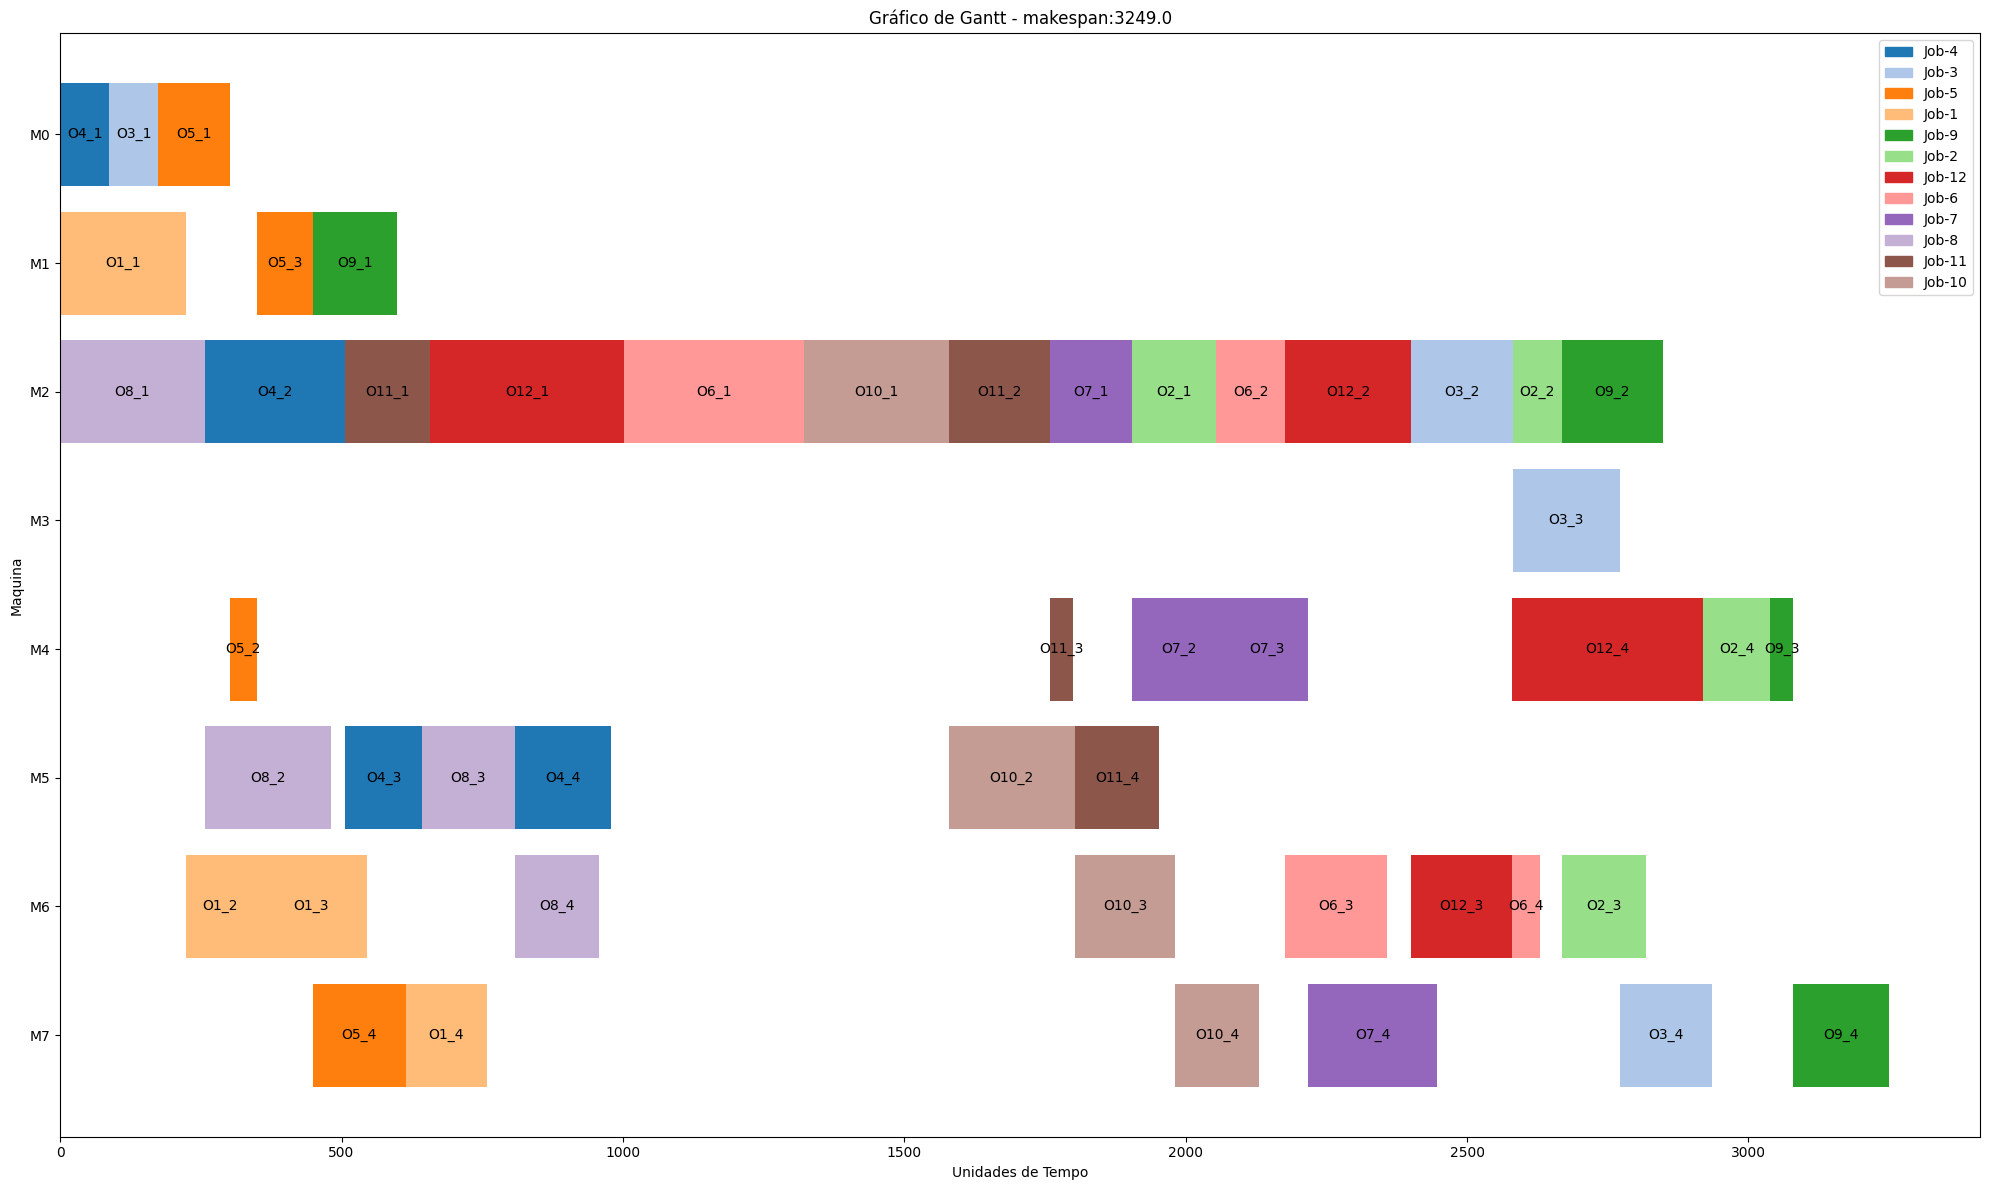

In [56]:
# Comparação com pior cromossomo
pop.pop[pop.scores.argmax()].show_output()